In [3]:
#! pip install dowhy
#! pip innstall econml

In [4]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

%reload_ext autoreload
%autoreload 2

## Carga del mockup dataset

In [5]:
df = pd.read_csv('simulated_data_2.csv')

In [6]:
df

,customer_id,age,gender,income_bracket,region,household_size,tenure,payment_history,monthly_consumption,customer_satisfaction_score,complaints_last_year,churn_risk_score,flag_unsatisfied,treatment,churned,post_intervention_satisfaction
0,0,45.960570,M,bajo,urbano,2,8.005516,1,48.858802,5.221074,4,0.109862,1,0,0,5.443736
1,1,38.340828,M,medio,urbano,3,6.450702,0,56.754625,6.088374,0,0.158069,0,1,0,6.773708
2,2,47.772262,M,alto,urbano,2,7.502395,1,70.299616,6.890282,2,0.052697,0,1,0,7.924775
3,3,58.276358,M,medio,urbano,1,11.838634,1,55.603568,5.125064,1,0.071723,0,0,0,5.303160
4,4,37.190160,F,bajo,urbano,2,6.836628,0,47.798866,7.249211,1,0.064875,0,1,0,8.065166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,55.613225,F,medio,urbano,4,5.085338,0,75.055422,5.735858,0,0.190032,1,1,0,6.607153
9996,9996,18.000000,F,medio,urbano,4,0.630427,3,62.622381,3.665672,7,0.606405,0,0,0,3.436760
9997,9997,31.536199,M,medio,rural,3,7.375893,2,58.757085,6.775811,2,0.175365,0,1,0,7.216436
9998,9998,45.949187,F,medio,urbano,2,6.614678,1,45.539655,4.503459,5,0.578835,0,0,0,4.137695


# Paso 1 - El modelo

In [7]:
gml_string = """
graph [directed 1
  node [
    id 0
    label "age"
  ]
  node [
    id 1
    label "gender"
  ]
  node [
    id 2
    label "income_bracket"
  ]
  node [
    id 3
    label "region"
  ]
  node [
    id 4
    label "household_size"
  ]
  node [
    id 5
    label "tenure"
  ]
  node [
    id 6
    label "payment_history"
  ]
  node [
    id 7
    label "monthly_consumption"
  ]
  node [
    id 8
    label "customer_satisfaction_score"
  ]
  node [
    id 9
    label "complaints_last_year"
  ]
  node [
    id 10
    label "churn_risk_score"
  ]
  node [
    id 11
    label "flag_unsatisfied"
  ]
  node [
    id 12
    label "treatment"
  ]
  node [
    id 13
    label "churned"
  ]
  node [
    id 14
    label "post_intervention_satisfaction"
  ]
  edge [
    source 0
    target 5
  ]
  edge [
    source 2
    target 6
  ]
  edge [
    source 0
    target 6
  ]
  edge [
    source 4
    target 7
  ]
  edge [
    source 2
    target 7
  ]
  edge [
    source 6
    target 8
  ]
  edge [
    source 2
    target 8
  ]
  edge [
    source 8
    target 9
  ]
  edge [
    source 6
    target 9
  ]
  edge [
    source 8
    target 10
  ]
  edge [
    source 9
    target 10
  ]
  edge [
    source 6
    target 10
  ]
  edge [
    source 5
    target 10
  ]
  edge [
    source 10
    target 11
  ]
  edge [
    source 11
    target 12
  ]
  edge [
    source 10
    target 12
  ]
  edge [
    source 12
    target 13
  ]
  edge [
    source 10
    target 13
  ]
  edge [
    source 2
    target 12
  ]
  edge [
    source 12
    target 14
  ]
  edge [
    source 13
    target 14
  ]
]
"""

# print(gml_string)

In [8]:
from dowhy import CausalModel

model = CausalModel(
    data=df,
    treatment='treatment',
    outcome='churned',
    graph=gml_string
    )

c:\Users\mcondedesimon\Documents\PLAYGROUND\mock_churn_causalty\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


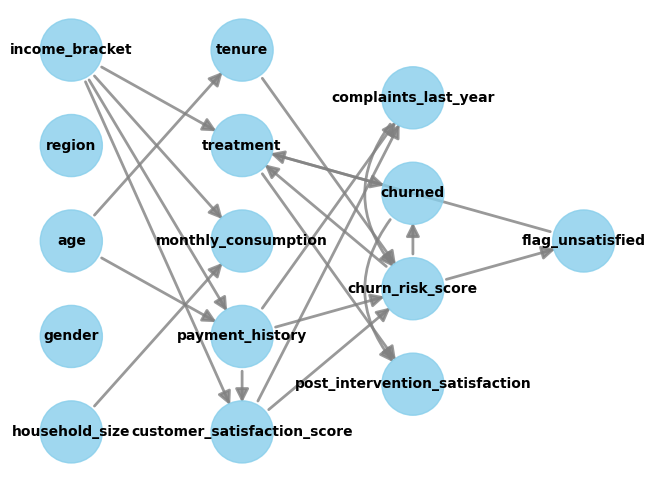

In [9]:
model.view_model()

# Paso 2 - El estimando

In [10]:
estimand = model.identify_effect()
print(estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                   
────────────(E[churned|churn_risk_score])
d[treatment]                             
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→churned then P(churned|treatment,churn_risk_score,U) = P(churned|treatment,churn_risk_score)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



# Matching

## Paso 3 - La estimación

In [28]:
estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.distance_matching',
    target_units='ate',
    method_params={'distance_metric': 'minkowski', 'p': 2}
    )

In [15]:
print(f'Estimate of causal effect (Matching): {estimate.value}')

Estimate of causal effect (Matching): -0.0765


## Paso 4 - Refutaciones

In [16]:
random_cause = model.refute_estimate(
    estimand=estimand,
    estimate=estimate,
    method_name='random_common_cause'
    )

print(random_cause)

Refute: Add a random common cause
Estimated effect:-0.0765
New effect:-0.07017299999999999
p value:0.17999999999999994



In [17]:
placebo_refuter = model.refute_estimate(
    estimand=estimand,
    estimate=estimate,
    method_name='placebo_treatment_refuter'
)

print(placebo_refuter)

Refute: Use a Placebo Treatment
Estimated effect:-0.0765
New effect:-0.0006559999999999999
p value:0.92



# Inverse Probability Weighting (IPW)

## Paso 3 - La estimación

In [18]:
estimate = model.estimate_effect(
identified_estimand=estimand,
method_name='backdoor.propensity_score_weighting',
target_units='ate')

In [19]:
print(f'Estimate of causal effect (IPW): {estimate.value}')

Estimate of causal effect (IPW): -0.07045588698348842


## Paso 4 - Refutaciones

# S-Learner

## Paso 3 - La estimación

In [74]:
from lightgbm import LGBMRegressor

estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.econml.metalearners.SLearner',
    target_units='ate',
    method_params={
        'init_params': {
        'overall_model': LGBMRegressor(
        n_estimators=500, max_depth=10)
    },
'fit_params': {}
})

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 3
[LightGBM] [Info] Start training from score 0.216600
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [75]:
print(f'Estimate of causal effect (S-Learner): {estimate.value}')

Estimate of causal effect (S-Learner): -0.07389330516591244


In [76]:
print(estimate.cate_estimates)

[[ 0.04545942]
 [-0.10990205]
 [-0.10470063]
 ...
 [-0.05839488]
 [-0.28423811]
 [ 0.11668634]]


In [61]:
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                   
────────────(E[churned|churn_risk_score])
d[treatment]                             
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→churned then P(churned|treatment,churn_risk_score,U) = P(churned|treatment,churn_risk_score)

## Realized estimand
b: churned~treatment+churn_risk_score
Target units: atc

## Estimate
Mean value: -0.07389330516591244
Effect estimates: [[ 0.04545942]
 [-0.10990205]
 [-0.10470063]
 ...
 [-0.05839488]
 [-0.28423811]
 [ 0.11668634]]



## Paso 4 - Refutaciones

# T-Learner

## Paso 3 - La estimación

In [ ]:
estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.econml.metalearners.TLearner',
    target_units='ate',
    method_params={
        'init_params': {
        'models': [
            LGBMRegressor(n_estimators=200,
                          max_depth=10),
            LGBMRegressor(n_estimators=200,
                          max_depth=10)
            ]
    },
    'fit_params': {}
})

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6685, number of used features: 1
[LightGBM] [Info] Start training from score 0.227375
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [45]:
print(f'Estimate of causal effect (T-Learner): {estimate.value}')

Estimate of causal effect (T-Learner): -0.07133210477233196


## Paso 4 - Refutaciones

# X-Learner

## Paso 3 - La estimación

In [52]:
estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.econml.metalearners.XLearner',
    target_units='ate',
    method_params={
        'init_params': {
            'models': [
                LGBMRegressor(n_estimators=50,
                              max_depth=10),
                LGBMRegressor(n_estimators=50,
                              max_depth=10)
                ],
            'cate_models': [
                LGBMRegressor(n_estimators=50,
                              max_depth=10),
                LGBMRegressor(n_estimators=50,
                              max_depth=10)
                ]
            },
        'fit_params': {},
        }
    )

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6685, number of used features: 1
[LightGBM] [Info] Start training from score 0.227375
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 3315, number of used features: 1
[LightGBM] [Info] Star

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [47]:
print(f'Estimate of causal effect (X-Learner): {estimate.value}')

Estimate of causal effect (X-Learner): -0.0712901859490516


## Paso 4 - Refutaciones

# DRLearner

## Paso 3 - La estimación

## Paso 4 - Refutaciones

# DML

## Paso 3 - La estimación

In [11]:
# from sklearn.linear_model import LassoCV
# from sklearn.ensemble import GradientBoostingRegressor

# estimate = model.estimate_effect(
#     identified_estimand=estimand,
#     method_name='backdoor.econml.dml.DML',
#     method_params={
#         'init_params': {
#         'model_y': GradientBoostingRegressor(),
#         'model_t': GradientBoostingRegressor(),
#         'model_final': LassoCV(fit_intercept=False),
#         },
#     'fit_params': {}}
# )

In [1]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor, LGBMClassifier

model_y = GridSearchCV(
    estimator=LGBMRegressor(),
    # Define the model's parameter search space
    param_grid={
    'max_depth': [3, 10, 20, 100],
    'n_estimators': [10, 50, 100]
    },
    # Define GridSearch params
    cv=10, n_jobs=-1, scoring='neg_mean_squared_error'
)

model_t = GridSearchCV(
    estimator=LGBMClassifier(),
    # Define the model's parameter search space
    param_grid={
    'max_depth': [3, 10, 20, 100],
    'n_estimators': [10, 50, 100]
    },
    # Define GridSearch params
    cv=10, n_jobs=-1, scoring='accuracy'
)

In [12]:
estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.econml.dml.LinearDML',
    target_units='ate',
    method_params={
        'init_params': {
        # Pass models wrapped in GridSearchCV objects
        'model_y': model_y,
        'model_t': model_t,
        # Set discrete treatment to `True`
        'discrete_treatment': True,
        # Define the number of cross-fitting folds
        'cv': 4
    },
    'fit_params': {
}
})

Model GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 10, 20, 100],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy') has a non-default cv attribute, which will be ignored


[LightGBM] [Info] Number of positive: 3315, number of negative: 6685
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000679 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.331500 -> initscore=-0.701409
[LightGBM] [Info] Start training from score -0.701409
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

Model GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 10, 20, 100],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error') has a non-default cv attribute, which will be ignored


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 1
[LightGBM] [Info] Start training from score 0.216600
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [13]:
print(f'Estimate of causal effect (DML): {estimate.value}')

Estimate of causal effect (DML): -0.07474659716644724


## Paso 4 - Refutaciones

In [61]:
random_cause = model.refute_estimate(
    estimand=estimand,
    estimate=estimate,
    method_name='random_common_cause'
    )

print(random_cause)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

Refute: Add a random common cause
Estimated effect:-0.07574627866620202
New effect:-0.0740484163860746
p value:0.32000000000000006



In [62]:
placebo_refuter = model.refute_estimate(
    estimand=estimand,
    estimate=estimate,
    method_name='placebo_treatment_refuter'
)

print(placebo_refuter)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

Refute: Use a Placebo Treatment
Estimated effect:-0.07574627866620202
New effect:2.391835967760817e-05
p value:0.98



# Causal Forest

## Paso 3 - La estimación

## Paso 4 - Refutaciones